<a class="anchor" id="2nd-bullet">

### 1.1. Import the needed libraries
    
</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data partition
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from regressors import stats
#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="3rd-bullet">

### Import the dataset
    
</a>

In [2]:
df = pd.read_csv('train.csv')
df.set_index('Access_ID', inplace = True)
df.head(3)

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
Access_ID,,,,,,,,,,,,,,,,
102863333,21-Mar-20,0,0.0,0,0.0,3,64.0,0.0000,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0
103117814,20-May-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0
103201891,4-Dec-20,0,0.0,0,0.0,8,95.0,0.0250,0.0583,0.0,Windows,4,Italy,1,Returner,0


<a class="anchor" id="4th-bullet">


## 3. Data Understanding

</a>



<a class="anchor" id="4th-bullet">


### 3.1 Logical Checks

</a>



In [3]:
#Check the info of the dataset
df.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 102863333 to 798444008
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        9999 non-null   object 
 1   AccountMng_Pages            9999 non-null   int64  
 2   AccountMng_Duration         9999 non-null   float64
 3   FAQ_Pages                   9999 non-null   int64  
 4   FAQ_Duration                9999 non-null   float64
 5   Product_Pages               9999 non-null   int64  
 6   Product_Duration            9999 non-null   float64
 7   GoogleAnalytics_BounceRate  9999 non-null   float64
 8   GoogleAnalytics_ExitRate    9999 non-null   float64
 9   GoogleAnalytics_PageValue   9999 non-null   float64
 10  OS                          9999 non-null   object 
 11  Browser                     9999 non-null   int64  
 12  Country                     9999 non-null   object 
 13  Type_of_Traffic     

In [4]:
#fix data types - will create dummy variables later
df.Type_of_Traffic = df.Type_of_Traffic.astype("str")
df.Browser = df.Browser.astype("str")
df["Date"]=pd.to_datetime(df["Date"])

In [5]:
# check distribution of target variable
print(df["Buy"].value_counts())
print("Percent of positive labels: " + str(round(df["Buy"].value_counts()[1]/len(df),2)))

0    8447
1    1552
Name: Buy, dtype: int64
Percent of positive labels: 0.16


In [167]:
#MISSING: checking the page values and duration variables

<a class="anchor" id="4th-bullet">


### 3.2 Data exploration

</a>



In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,9999.0,2.324232,3.340676,0.0,0.0000,1.0000,4.00000,27.0000
AccountMng_Duration,9999.0,81.205854,179.715545,0.0,0.0000,7.5000,92.20835,3398.7500
FAQ_Pages,9999.0,0.508051,1.279390,0.0,0.0000,0.0000,0.00000,24.0000
FAQ_Duration,9999.0,34.559101,139.796989,0.0,0.0000,0.0000,0.00000,2549.3750
Product_Pages,9999.0,31.685869,44.550277,0.0,7.0000,18.0000,38.00000,705.0000
Product_Duration,9999.0,1199.769430,1958.276304,0.0,183.5625,599.0000,1470.27080,63973.5222
GoogleAnalytics_BounceRate,9999.0,0.022305,0.048776,0.0,0.0000,0.0032,0.01680,0.2000
GoogleAnalytics_ExitRate,9999.0,0.043181,0.048845,0.0,0.0143,0.0251,0.05000,0.2000
GoogleAnalytics_PageValue,9999.0,5.963120,18.753626,0.0,0.0000,0.0000,0.00000,361.7637
Buy,9999.0,0.155216,0.362128,0.0,0.0000,0.0000,0.00000,1.0000


#### Observations:
- the dataset don't have null values
- it has outliers in some features - need to explore and solve them
- it has 9.999 observations and 15 features (9 numerical and 6 categorical)
- the dependent variable is 'Buy'

In [29]:
# split the dataset
X = df.drop('Buy', axis=1)
y = df['Buy']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=5, stratify=y)

In [30]:
# Define metric and non-metric features
non_metric_features = ['Date', 'OS', 'Browser', 'Country', 'Type_of_Traffic', 'Type_of_Visitor']
metric_features = X_train.columns.drop(non_metric_features).to_list()

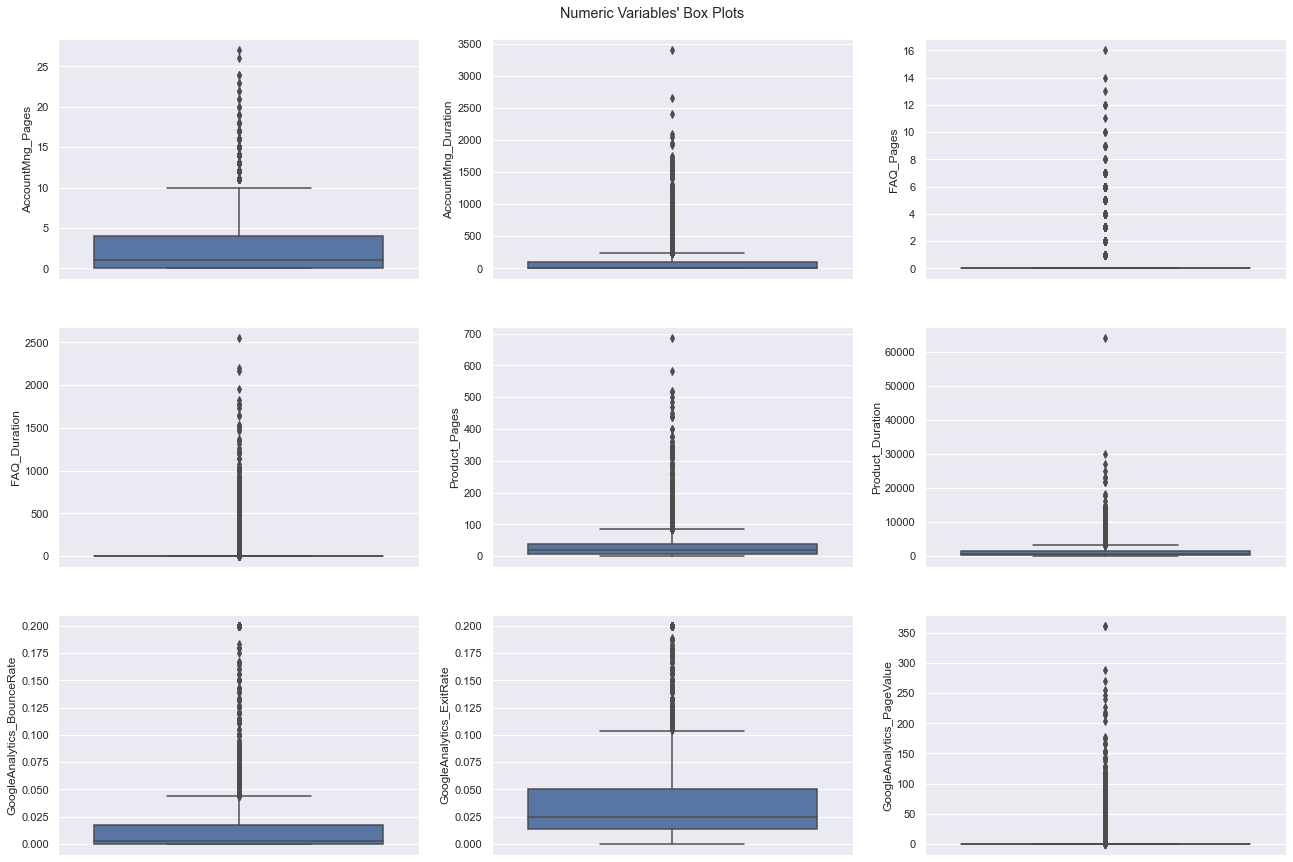

In [31]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(y=X_train[feat], ax=ax)
    #ax.set_title(feat, y=-0.16)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title, y=0.91)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

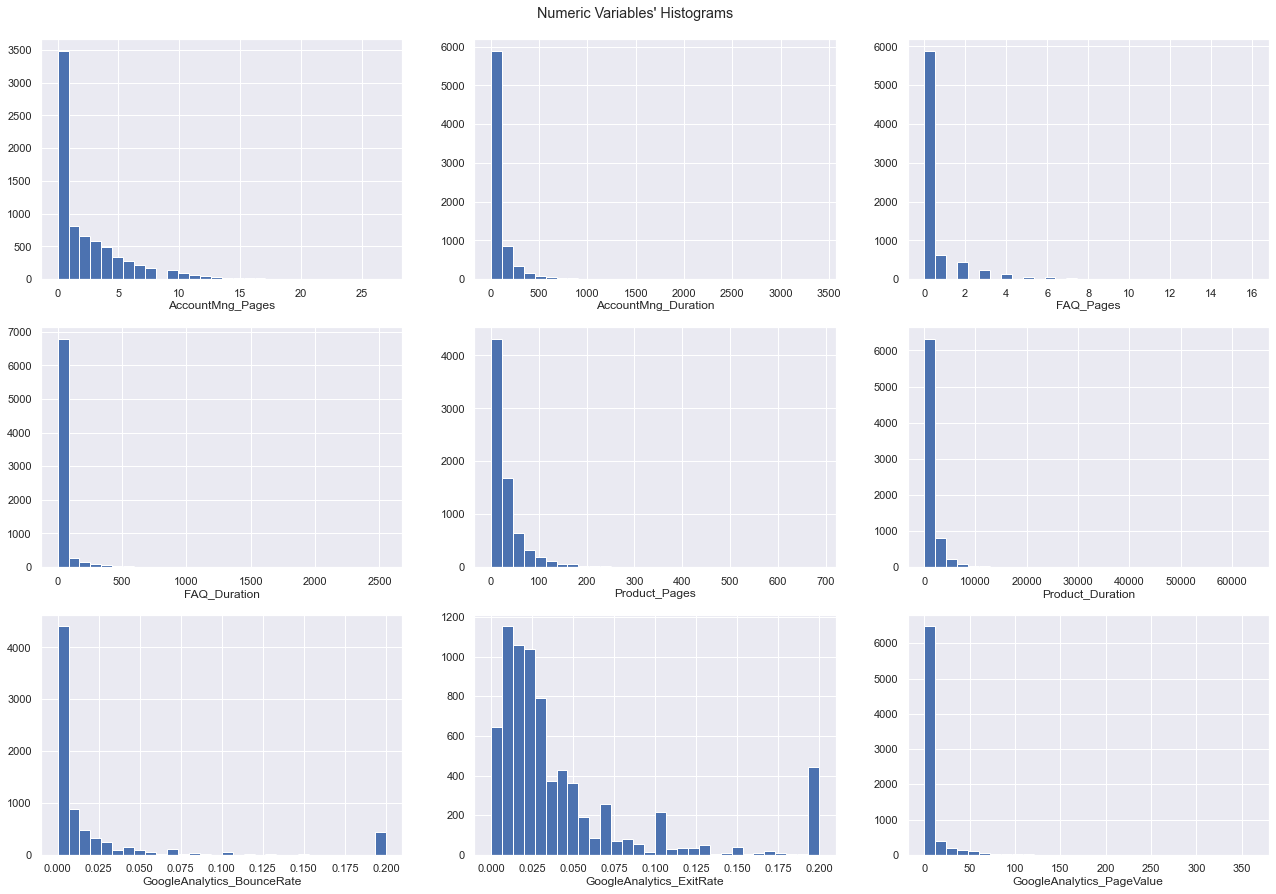

In [10]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(X_train[feat], bins=30)
    ax.set_title(feat, y=-0.15)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title, y=0.91)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_histograms.png'), dpi=200)
plt.show()

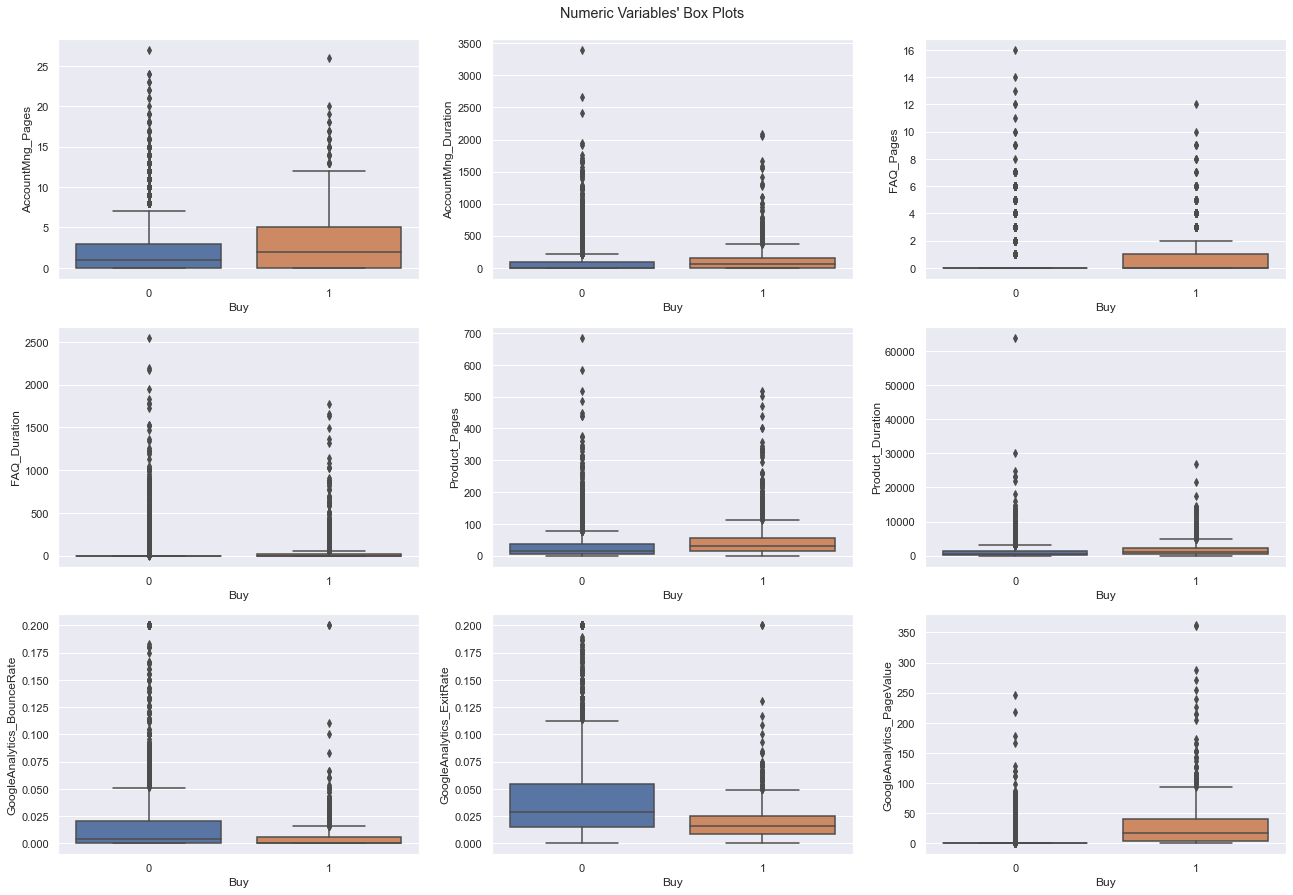

In [11]:
# All Numeric Variables' Box Plots in one figure - with the dependent variable
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(y=X_train[feat], x=y_train, ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title, y=0.91)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

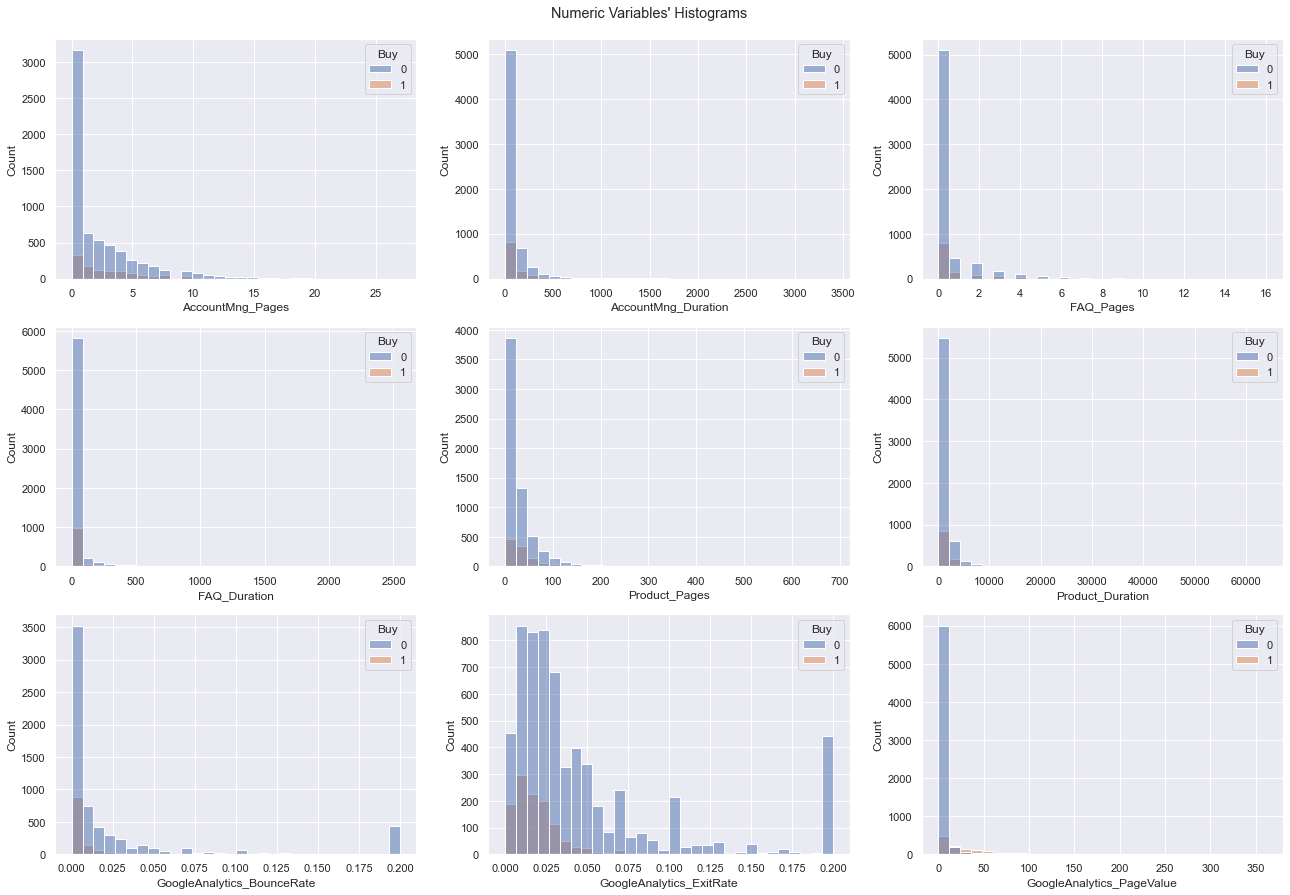

In [12]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.histplot(data=X_train, x=feat, hue=y_train, ax=ax, bins=30)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title, y=0.91)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_histograms.png'), dpi=200)
plt.show()

Observations:
- the dataset has outliers in all of the numeric features
- the data is right skewed in all of the numeric features, there is a lot of zero values in all features except in 'GoogleAnalytics_ExitRate'
- the distribution of the observations that didn't buy the products is very similar to those that bought the product. This means that it can be difficult to the model to learn the differences of these two groups

<a class="anchor" id="4th-bullet">


### 3.3 Outliers

</a>



In [32]:
#baseline model performance
X_train_num = X_train[metric_features]
X_val_num = X_val[metric_features]

In [33]:
#define model
model1 = LogisticRegression().fit(X_train_num, y_train)
y_pred_train = model1.predict(X_train_num)
y_pred_val = model1.predict(X_val_num)

#results
print('f1_train:', f1_score(y_train, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.4913693901035672
[[2063   49]
 [ 263  125]]
precision: 0.7183908045977011
f1_val: 0.44483985765124556


In [34]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train_backup = df_train.copy()

In [35]:
#function to automatically remove outliers besed on the IQR, not currently in use
def outliers(df_train,metric_features):
    for variable in metric_features:
        var_mean = df_train[variable].mean()
        var_std = df_train[variable].std()
        df_train=df_train.loc[df_train[variable] < var_mean + (5 * var_std)]
        df_train=df_train.loc[df_train[variable] > var_mean - (5 * var_std)]
    return df_train
df_train = outliers(df_train,metric_features)

In [36]:
print('Percentage of data kept after removing outliers:', np.round(df_train.shape[0] / df_train_backup.shape[0], 4))

Percentage of data kept after removing outliers: 0.9593


In [37]:
#testing model performance after removing outliers
X_train_num = df_train.drop(['Buy'], axis=1)[metric_features]
y_train = df_train['Buy']

In [38]:
#define model
model2 = LogisticRegression().fit(X_train_num, y_train)
y_pred_train = model2.predict(X_train_num)
y_pred_val = model2.predict(X_val_num)

#results
print('f1_train:', f1_score(y_train, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.5087719298245614
[[2038   74]
 [ 248  140]]
precision: 0.6542056074766355
f1_val: 0.46511627906976744


In [39]:
#resetting the dataset
df_train = df_train_backup.copy()

In [40]:
# Manually defined tresholds for outliers using boxplots

filters1 = (
    (df_train['AccountMng_Duration']<=2000)
    &(df_train['AccountMng_Pages']<=20)
    &(df_train['GoogleAnalytics_BounceRate']<=.17)
    &(df_train['FAQ_Duration']<=1500)
    &(df_train['FAQ_Pages']<=13)
    &(df_train['Product_Pages']<=500)
    &(df_train['Product_Duration']<=25000)
    &(df_train['GoogleAnalytics_PageValue']<=300)
)

filters2 = (
    (df_train['AccountMng_Duration']<=2000)
    &
    (df_train['FAQ_Duration']<=2000)
    &
    (df_train['Product_Pages']<=650)
    &
    (df_train['Product_Duration']<=50000)
    &
    (df_train['GoogleAnalytics_PageValue']<=350)
)

df_train = df_train[filters1]

print('Percentage of data kept after removing outliers:', np.round(df_train.shape[0] / df_train_backup.shape[0], 4))

Percentage of data kept after removing outliers: 0.9365


In [41]:
#testing model performance after removing outliers using manual thresholds
X_train_num = df_train.drop(['Buy'], axis=1)[metric_features]
y_train = df_train['Buy']

In [42]:
#define model
model3 = LogisticRegression().fit(X_train_num, y_train)
y_pred_train = model3.predict(X_train_num)
y_pred_val = model3.predict(X_val_num)

#results
print('f1_train:', f1_score(y_train, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.49624060150375937
[[2059   53]
 [ 262  126]]
precision: 0.7039106145251397
f1_val: 0.4444444444444445


Observations:
- at this stage, using automated outlier removal was the better option, but this was partially due to the inclusion of all numeric variables, like FAQ_Duration that has many outliers but not a lot of relevency. As we refine our variable selection, manual outlier selection produced a more accurate model. 
- filters2 is the result of finding the best outlier filters after feature selection, which we will use here to keep the results accurate to our report.

In [43]:
df_train = df_train_backup.copy()
df_train = df_train[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_train.shape[0] / df_train_backup.shape[0], 4))

Percentage of data kept after removing outliers: 0.9987


<a class="anchor" id="4th-bullet">


## 4. Data Preparation

</a>



<a class="anchor" id="4th-bullet">


### 4.1 Feature Engineering and Transformation

</a>



In [44]:
X_train = df_train.drop(['Buy'], axis=1)
y_train = df_train['Buy']

In [45]:
#create dummy variables in train data:

#type of visitor
dict_visitor = {'Returner': 0, 'New_Access': 1, 'Other': 0}
X_train['Type_of_Visitor_new'] = X_train['Type_of_Visitor'].map(dict_visitor)
dict_visitor = {'Returner': 1, 'New_Access': 0, 'Other': 0}
X_train['Type_of_Visitor_return'] = X_train['Type_of_Visitor'].map(dict_visitor)

#type of traffic
X_train["Type_of_Traffic_high"]=X_train["Type_of_Traffic"].map(lambda x: 1 if (x in [7,8,15]) else 0)
X_train["Type_of_Traffic_med"]=X_train["Type_of_Traffic"].map(lambda x: 1 if (x in [10,11,2,5]) else 0)
X_train = pd.get_dummies(X_train, columns = ["Type_of_Traffic"], drop_first=True)

#create month variable from the date information 
X_train["Month"]=X_train["Date"].map(lambda x: x.month)
X_train["Months_high"]=X_train["Month"].map(lambda x: 1 if x>7 & x<12 else 0)
today = pd.to_datetime("2021-01-01")
X_train["Time_not_visited"]=X_train["Date"].map(lambda x: (today-x).days)

#OS
X_train["is_apple"]=X_train["OS"].map(lambda x: 1 if (x in ['iOS', 'MacOSX']) else 0)
X_train = pd.get_dummies(X_train, columns = ['OS'], drop_first=True)
X_train.drop('OS_Other', inplace=True, axis=1)

# same for validation data
#type of visitor
X_val['Type_of_Visitor_new'] = X_val['Type_of_Visitor'].map(dict_visitor)
X_val['Type_of_Visitor_return'] = X_val['Type_of_Visitor'].map(dict_visitor)

#type of traffic
X_val["Type_of_Traffic_high"]=X_val["Type_of_Traffic"].map(lambda x: 1 if (x in [7,8,15]) else 0)
X_val["Type_of_Traffic_med"]=X_val["Type_of_Traffic"].map(lambda x: 1 if (x in [10,11,2,5]) else 0)
X_val = pd.get_dummies(X_val, columns = ["Type_of_Traffic"], drop_first=True)

#create month variable from the date information 
X_val["Month"]=X_val["Date"].map(lambda x: x.month)
X_val["Months_high"]=X_val["Month"].map(lambda x: 1 if x>7 & x<12 else 0)
X_val["Time_not_visited"]=X_val["Date"].map(lambda x: (today-x).days)

#OS
X_val["is_apple"]=X_val["OS"].map(lambda x: 1 if (x in ['iOS', 'MacOSX']) else 0)
X_val = pd.get_dummies(X_val, columns = ['OS'], drop_first=True)

In [55]:
#engineering: time spent per page variables  
X_train["Mng"] = X_train.AccountMng_Duration/X_train.AccountMng_Pages
X_train["FAQ"] = X_train.FAQ_Duration/X_train.FAQ_Pages
X_train["Product"] = X_train.Product_Duration/X_train.Product_Pages
X_train.fillna(0, inplace=True)

X_val["Mng"] = X_val.AccountMng_Duration/X_val.AccountMng_Pages
X_val["FAQ"] = X_val.FAQ_Duration/X_val.FAQ_Pages
X_val["Product"] = X_val.Product_Duration/X_val.Product_Pages
X_val.fillna(0, inplace=True)

In [56]:
#engineering: Country data  
country_gdp_2019 = {
"Portugal": 79,         
"Spain": 91,              
"Brazil": 100,           
"France": 106,           
"Other": 100,             
"Italy": 96,            
"United Kingdom": 104,   
"Germany": 120,           
"Switzerland": 157
}
country_digital_2019 = {
"Portugal": 20.71,         
"Spain": 32.48,              
"Brazil": 62.03,           
"France": 52.84,           
"Other": 57.80,             
"Italy": 39.79,            
"United Kingdom": 72.77,   
"Germany": 	58.69,           
"Switzerland": 67.49
}

In [57]:
#engineering: Country data train
X_train["country_gdp_2019"] = X_train["Country"].apply(lambda x: country_gdp_2019[x])
X_train["country_digital_2019"] = X_train["Country"].apply(lambda x: country_digital_2019[x])
#engineering: Country data val
X_val["country_gdp_2019"] = X_val["Country"].apply(lambda x: country_gdp_2019[x])
X_val["country_digital_2019"] = X_val["Country"].apply(lambda x: country_digital_2019[x])

In [58]:
#creating log transormations of numeric variables 
#AccountMng_Pages
X_train["logAccountMng_Pages"]=X_train["AccountMng_Pages"].map(lambda x : 1 if x<=1 else x)
X_train["logAccountMng_Pages"]=np.log(X_train["logAccountMng_Pages"])
#AccountMng_Pages
X_train["logAccountMng_Duration"]=X_train["AccountMng_Duration"].map(lambda x : 1 if x<=1 else x)
X_train["logAccountMng_Duration"]=np.log(X_train["logAccountMng_Duration"])
#logFAQ_Pages
X_train["logFAQ_Pages"]=X_train["FAQ_Pages"].map(lambda x : 1 if x<=1 else x)
X_train["logFAQ_Pages"]=np.log(X_train["logFAQ_Pages"])

#AccountMng_Pages
X_val["logAccountMng_Pages"]=X_val["AccountMng_Pages"].map(lambda x : 1 if x<=1 else x)
X_val["logAccountMng_Pages"]=np.log(X_val["logAccountMng_Pages"])
#AccountMng_Pages
X_val["logAccountMng_Duration"]=X_val["AccountMng_Duration"].map(lambda x : 1 if x<=1 else x)
X_val["logAccountMng_Duration"]=np.log(X_val["logAccountMng_Duration"])
#logFAQ_Pages
X_val["logFAQ_Pages"]=X_val["FAQ_Pages"].map(lambda x : 1 if x<=1 else x)
X_val["logFAQ_Pages"]=np.log(X_val["logFAQ_Pages"])

In [59]:
#confirming the same variables were created for both sets
X_train.shape[1]==X_val.shape[1]

True

In [ ]:
#MISSING: scaling numeric variables 

In [ ]:
#scaler = MinMaxScaler().fit(X_train_num)
#X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

# Convert the array to a pandas dataframe
#X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
#X_val_num_scaled = scaler.transform(X_val_num)
#X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)

In [60]:
#Power transforming variables 
non_metric_features = X_train.columns.drop(metric_features).to_list()
#separate numeric and non-numeric
X_train_num = X_train[metric_features]
X_train_cat = X_train[non_metric_features]
# DO IT for validation
X_val_num = X_val[metric_features]
X_val_cat = X_val[non_metric_features]

In [61]:
#use train to power transform train
power = PowerTransformer().fit(X_train_num)
X_train_num_power = power.transform(X_train_num)
X_train_num_power = pd.DataFrame(X_train_num_power, columns = X_train_num.columns).set_index(X_train_num.index)

#and for validation (using train data)
X_val_num_power = power.transform(X_val_num)
# Convert the array to a pandas dataframe
X_val_num_power = pd.DataFrame(X_val_num_power, columns = X_val_num.columns).set_index(X_val_num.index)
X_val_num_power.head(3)

X_train_power = pd.concat([X_train_num_power, X_train_cat], axis=1)
X_val_power = pd.concat([X_val_num_power, X_val_cat], axis=1)

<a class="anchor" id="4th-bullet">


### 4.2 Feature Selection

</a>



In [62]:
#none of the features are univariate
X_train_num.var()

AccountMng_Pages              1.119390e+01
AccountMng_Duration           2.846111e+04
FAQ_Pages                     1.542735e+00
FAQ_Duration                  1.681263e+04
Product_Pages                 1.890272e+03
Product_Duration              3.113193e+06
GoogleAnalytics_BounceRate    2.396840e-03
GoogleAnalytics_ExitRate      2.416911e-03
GoogleAnalytics_PageValue     3.446348e+02
dtype: float64

In [194]:
all_train_num = X_train_num.join(y_train)
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()
#build correlation matrix
cor_spearman = all_train_num.corr(method ='spearman')

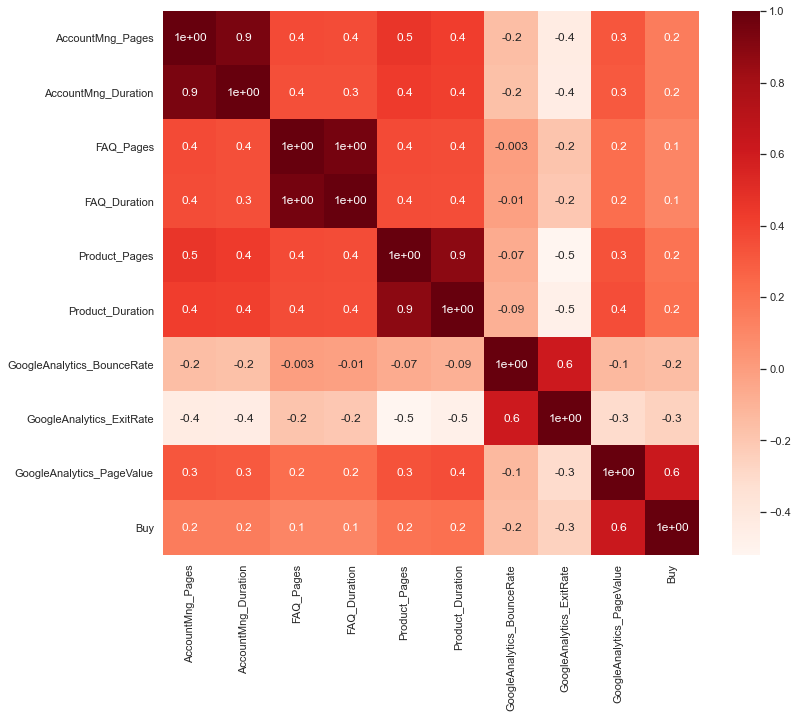

In [195]:
cor_heatmap(cor_spearman)

Observations:
- Features highly correlated (keep only one):
    - __'AccountMng_Pages'__ and __'AccountMng_Duration'__ (Number of pages visited and total amount of time spent by the user - account management related pages)
    - __'FAQ_Pages'__ and __'FAQ_Duration'__ (Number of pages visited and total amount of time spent by the user - FAQ related pages)
    - __'Product_Pages'__ and __'Product_Duration'__ (Number of pages visited and total amount of time spent by the user - Product related pages)
    - __'GoogleAnalytics_BounceRate'__ and __'GoogleAnalytics_ExitRate'__ (Bounce and exit rate, both explains the the exit rate of the pages visited by the user)

In [196]:
#lasso part 1: correlated features only
X_train_num_sub = X_train_num[['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration',
       'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate']]

In [197]:
lasso1 = LogisticRegression(penalty='l1', solver='liblinear')
lasso1.fit(X_train_num_sub, y_train)
coef = pd.Series(lasso1.coef_[0], index = X_train_num_sub.columns)

In [198]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 7 variables and eliminated the other 1 variables


In [199]:
coef.sort_values()

GoogleAnalytics_ExitRate     -29.134537
AccountMng_Pages              -0.004033
Product_Pages                 -0.001897
GoogleAnalytics_BounceRate     0.000000
AccountMng_Duration            0.000134
Product_Duration               0.000155
FAQ_Duration                   0.000232
FAQ_Pages                      0.036772
dtype: float64

Observations:
- the number of pages visited variables were more valuable for the first three pairs, and ‘GoogleAnalytics_ExitRate’ was more important than ‘GoogleAnalytics_BounceRate’, so the latter variable was dropped for each of the above pairs.

In [220]:
X_train_power.drop(["GoogleAnalytics_BounceRate","AccountMng_Duration","Product_Duration","FAQ_Duration"], inplace=True, axis=1)
X_val_power.drop(["GoogleAnalytics_BounceRate","AccountMng_Duration","Product_Duration","FAQ_Duration"], inplace=True, axis=1)

In [202]:
#chi-squared test for categorical variables 
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [203]:
df_sub = df_train[['Date', 'OS', 'Browser', 'Country', 'Type_of_Traffic', 'Type_of_Visitor']]

In [216]:
for var in df_sub:
    TestIndependence(df_train[var],df_train["Buy"], var)

Date is IMPORTANT for Prediction
OS is IMPORTANT for Prediction
Browser is IMPORTANT for Prediction
Country is NOT an important predictor. (Discard Country from model)
Type_of_Traffic is IMPORTANT for Prediction
Type_of_Visitor is IMPORTANT for Prediction


In [212]:
X_train_power.drop("Country",inplace=True,axis=1)
X_val_power.drop("Country",inplace=True,axis=1)

In [222]:
X_train_num_power = X_train_power.select_dtypes(include=np.number).set_index(X_train_power.index)
X_val_num_power = X_val_power.select_dtypes(include=np.number).set_index(X_val_power.index)

In [225]:
#lasso regression part 2
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [230]:
lasso2 = LogisticRegression(penalty='l1', solver='liblinear', C=.4)
lasso2.fit(X_train_num_power, y_train)
coef = pd.Series(lasso2.coef_[0], index = X_train_num_power.columns)

In [231]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 19 variables and eliminated the other 15 variables


In [241]:
coef.sort_values()

GoogleAnalytics_ExitRate    -0.469195
Type_of_Visitor_return      -0.460001
logAccountMng_Pages         -0.425862
OS_MacOSX                   -0.271507
Type_of_Traffic_13          -0.239341
logFAQ_Pages                -0.085786
OS_iOS                      -0.058006
Product_Pages               -0.053579
logAccountMng_Duration      -0.049703
OS_Ubuntu                    0.000000
Type_of_Traffic_5            0.000000
OS_Fedora                    0.000000
OS_Chrome OS                 0.000000
Type_of_Traffic_9            0.000000
Type_of_Traffic_7            0.000000
Type_of_Traffic_6            0.000000
OS_Windows                   0.000000
Type_of_Traffic_3            0.000000
Type_of_Traffic_14           0.000000
Type_of_Traffic_12           0.000000
Type_of_Traffic_med          0.000000
Type_of_Traffic_high         0.000000
Type_of_Visitor_new          0.000000
Type_of_Traffic_4            0.000000
Month                        0.005747
FAQ_Pages                    0.068954
Type_of_Traf

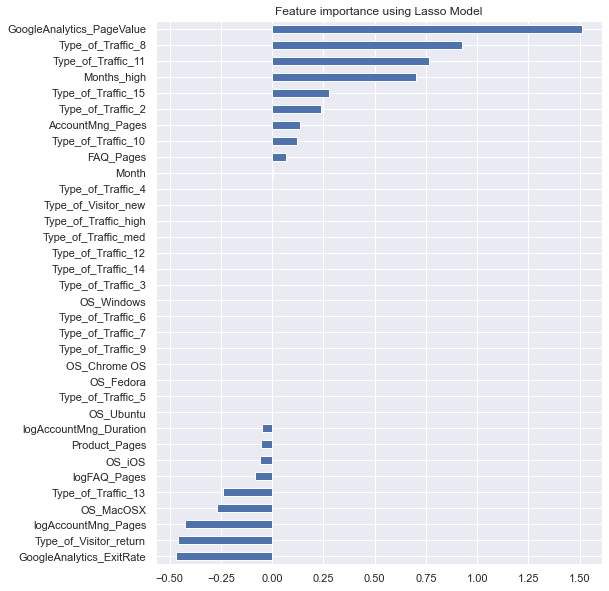

In [233]:
plot_importance(coef,'Lasso')

In [240]:
X_train_num_power.drop(['OS_Ubuntu','Type_of_Traffic_5','OS_Fedora',
                        'OS_Chrome OS','Type_of_Traffic_9','Type_of_Traffic_7',
                        'Type_of_Traffic_6','OS_Windows','Type_of_Traffic_3',
                        'Type_of_Traffic_14','Type_of_Traffic_12','Type_of_Traffic_med',
                        'Type_of_Traffic_high','Type_of_Visitor_new','Type_of_Traffic_4'], inplace=True, axis=1)
X_val_num_power.drop(['OS_Ubuntu','Type_of_Traffic_5','OS_Fedora',
                        'OS_Chrome OS','Type_of_Traffic_9','Type_of_Traffic_7',
                        'Type_of_Traffic_6','OS_Windows','Type_of_Traffic_3',
                        'Type_of_Traffic_14','Type_of_Traffic_12','Type_of_Traffic_med',
                        'Type_of_Traffic_high','Type_of_Visitor_new','Type_of_Traffic_4'], inplace=True, axis=1)

In [248]:
#RFE loop test with remaining variables

#no of features
nof_list=np.arange(1,27)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_power,y_train)
    X_val_rfe = rfe.transform(X_val_num_power)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.897200


In [249]:
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 10)
X_rfe = rfe.fit_transform(X = X_train_num_power, y = y_train)
selected_features = pd.Series(rfe.support_, index = X_train_num_power.columns)
selected_features

AccountMng_Pages             False
FAQ_Pages                    False
Product_Pages                False
GoogleAnalytics_ExitRate      True
GoogleAnalytics_PageValue     True
Type_of_Visitor_return        True
Type_of_Traffic_10           False
Type_of_Traffic_11            True
Type_of_Traffic_13            True
Type_of_Traffic_15            True
Type_of_Traffic_2            False
Type_of_Traffic_8             True
Month                        False
Months_high                   True
OS_MacOSX                     True
OS_iOS                       False
logAccountMng_Pages           True
logAccountMng_Duration       False
logFAQ_Pages                 False
dtype: bool

In [251]:
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 4)
X_rfe = rfe.fit_transform(X = X_train_num_power, y = y_train)
selected_features = pd.Series(rfe.support_, index = X_train_num_power.columns)
selected_features

AccountMng_Pages             False
FAQ_Pages                    False
Product_Pages                False
GoogleAnalytics_ExitRate     False
GoogleAnalytics_PageValue     True
Type_of_Visitor_return        True
Type_of_Traffic_10           False
Type_of_Traffic_11            True
Type_of_Traffic_13           False
Type_of_Traffic_15           False
Type_of_Traffic_2            False
Type_of_Traffic_8             True
Month                        False
Months_high                  False
OS_MacOSX                    False
OS_iOS                       False
logAccountMng_Pages          False
logAccountMng_Duration       False
logFAQ_Pages                 False
dtype: bool

Observations:
- Important variables include 'GoogleAnalytics_PageValue', 'Type_of_Visitor_return', 'Type_of_Traffic_11' and 'Type_of_Traffic_8'

<a class="anchor" id="4th-bullet">


### 4.3 Data Balancing

</a>

